In [1]:
import torch
import pickle 
import numpy as np

In [2]:
load_path = 'models/model.pth'

In [3]:
model = torch.load(load_path)

In [4]:
model

TimeGAN(
  (embedder): EmbeddingNetwork(
    (emb_rnn): GRU(6, 512, num_layers=3, batch_first=True)
    (emb_linear): Linear(in_features=512, out_features=512, bias=True)
    (emb_sigmoid): Sigmoid()
  )
  (generator): GeneratorNetwork(
    (gen_rnn): GRU(6, 512, num_layers=3, batch_first=True)
    (gen_linear): Linear(in_features=512, out_features=512, bias=True)
    (gen_sigmoid): Sigmoid()
  )
  (discriminator): DiscriminatorNetwork(
    (dis_rnn): GRU(512, 512, num_layers=3, batch_first=True)
    (dis_linear): Linear(in_features=512, out_features=1, bias=True)
  )
  (recovery): RecoveryNetwork(
    (rec_rnn): GRU(512, 512, num_layers=3, batch_first=True)
    (rec_linear): Linear(in_features=512, out_features=6, bias=True)
  )
  (supervisor): SupervisorNetwork(
    (sup_rnn): GRU(512, 512, num_layers=2, batch_first=True)
    (sup_linear): Linear(in_features=512, out_features=512, bias=True)
    (sup_sigmoid): Sigmoid()
  )
)

In [8]:
from models.utils import timegan_generator
from data.utils import dataset_maker

In [9]:
seed = 42
if torch.cuda.is_available():
    print("Using CUDA\n")
    device = torch.device("cuda:0")
    # torch.cuda.manual_seed_all(args.seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
else:
    print("Using CPU\n")
    device = torch.device("cpu")
seq_len = 24

X, T, dataset = dataset_maker(data_name='stock', seq_len=seq_len)
p = X.shape[2]

Using CUDA

Processing training data with shape torch.Size([3661, 24, 6])


In [11]:
gen_data = timegan_generator(model=model, device=device, T=T, max_seq_len=seq_len, Z_dim=p)

In [12]:
gen_data.shape

(3661, 24, 6)

In [14]:
import matplotlib.pyplot as plt

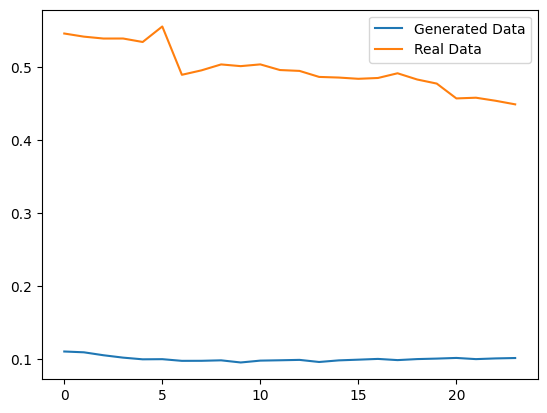

In [18]:
plt.plot(gen_data[0][:,0], label='Generated Data')
plt.plot(X[0][:,0], label='Real Data')
plt.legend()